# K-means and PCA

( Les parties sont indépendantes et les noms des tableaux/dimensions/constantes sont les mêmes )

## 1 Lab  tasks

### 1.1 K-means: Clustering some synthetic data

- Imports :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

- Récupération des données du fichier 'data_kmeans.txt' :

In [3]:
X = pd.read_csv('data/kmeans/data_kmeans.txt', names = ['x1','x2'], sep = " ")
X.head()

,x1,x2
0,1.8421,4.6076
1,5.6586,4.8000
2,6.3526,3.2909
3,2.9040,4.6122
4,3.2320,4.9399


- Fonctions de conversion des DataFrame en Array et Array en DataFrame :

In [4]:
def convert_to_array(X) :
    return np.array(X)

def convert_X_to_df(X) :
    return pd.DataFrame(data = X, columns = ['x1','x2'])

def convert_ɵ_to_df(ɵ) :
    return pd.DataFrame(data = ɵ, columns = ['ɵx','ɵy'])

- Renseignement des dimensions/constantes :

In [5]:
X = convert_X_to_df(X)

# Nombre d'exemples d'entrainement :
I = len(X)
print("I =", I)

# Nombre de features :
N = len(X.columns)
print("N =", N)

# Nombre ditération pour l'entrainement :
iteration = 100
print("iteration =", iteration)

I = 300
N = 2
iteration = 100


- Représentation graphique des données :

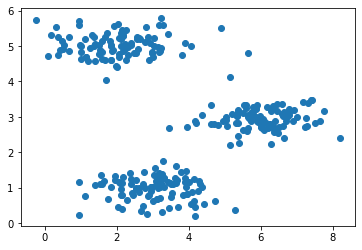

In [6]:
X = convert_X_to_df(X)
plt.scatter(X['x1'], X['x2'])
plt.show()

Avec cette représentation graphique, on peut determiner les valeurs de mu non aléatoirement, puisque les clusters sont évidents.

In [7]:
# Nombre de K
K = 3
print("K =", K)

K = 3


- Fonction d'initialisation de ɵ à partir des données de mu que nous avons choisi :

In [22]:
def init() :
    mu1 = [7.9, 3.2]
    mu2 = [0.9, 6.1]
    mu3 = [1.5, 0.3]
    ɵ = pd.DataFrame(data = [mu1, mu2, mu3], columns=['ɵx','ɵy'])
    return ɵ

- Représentation graphique de ɵ (orange) dans les données (bleu) :

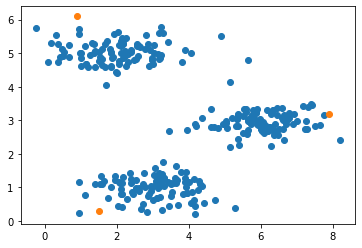

In [23]:
ɵ = init()
ɵ = convert_ɵ_to_df(ɵ)
X = convert_X_to_df(X)
plt.scatter(X['x1'], X['x2'])
plt.scatter(ɵ['ɵx'], ɵ['ɵy'])
plt.show()

- Fonction de récuperation des distances entre chaque points et chaque mu :

In [24]:
def get_D(ɵ, X) :
    d = np.zeros(shape=(len(X), K))
    for i in range(len(X)) :
        for k in range(K) :
            d[i][k] = np.sqrt(np.sum((X[i] - ɵ[k])**2))        
    return d

- Fonction pour trouver Ŷ :

In [25]:
def get_Ŷ(D):
    Ŷ = []
    for d in D :
        Ŷ.append(np.argmin(d))
    return Ŷ

- Fonction de mise à jour des ɵ :

In [26]:
def get_ɵ(Ŷ, ɵ) :
    for k in range(K):
        x = 0
        y = 0
        cpt = 0
        for i in range(I):
            if Ŷ[i] == k :
                x += X[i][0]
                y += X[i][1]
                cpt += 1
        if cpt > 0 :
            ɵ[k][0] = x/cpt
            ɵ[k][1] = y/cpt
    return ɵ

- Entrainement :

In [27]:
ɵ = init()
ɵ = convert_to_array(ɵ)
X = convert_to_array(X)
mu_1 = [ɵ[0].tolist()]
mu_2 = [ɵ[1].tolist()]
mu_3 = [ɵ[2].tolist()]
ɵ_old = np.array([[0.0,0.0],[0.0,0.0],[0.0,0.0]])

for itera in range(iteration) :
    ɵ_old = ɵ
    D = get_D(ɵ, X)
    Ŷ = get_Ŷ(D)
    ɵ = get_ɵ(Ŷ, ɵ)        
    mu_1.append(ɵ[0].tolist())
    mu_2.append(ɵ[1].tolist())
    mu_3.append(ɵ[2].tolist())

mu_1 = np.array(mu_1)
mu_2 = np.array(mu_2)
mu_3 = np.array(mu_3)

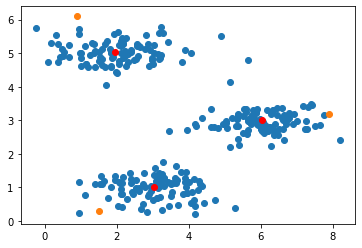

In [29]:
X = convert_X_to_df(X)

    # Affichage des données
plt.scatter(X['x1'], X['x2'])

    # Affichage de la première valeur de chaque point de référence
plt.scatter([mu_3[0][0], mu_2[0][0], mu_1[0][0]], [mu_3[0][1], mu_2[0][1], mu_1[0][1]])

    # Affichage de tous les points de référence mu à chaque itération entre ]0, iteration[
#plt.scatter(mu_1[1:-1,:1], mu_1[1:-1,1:])
#plt.scatter(mu_2[1:-1,:1], mu_2[1:-1,1:])
#plt.scatter(mu_3[1:-1,:1], mu_3[1:-1,1:])

    # Affichage de la dernière valeur de chaque point de référence
plt.scatter([mu_3[-1:,:1], mu_2[-1:,:1], mu_1[-1:,:1]], [mu_3[-1:,1:], mu_2[-1:,1:], mu_1[-1:,1:]], color='r')

plt.show()

- Création de données test :

In [14]:
X_test = np.random.rand(10,2)*8
print(X_test)

[[6.75757991 3.30276884]
 [5.62630207 2.95283294]
 [6.62577651 2.27869805]
 [2.51474564 0.79080494]
 [4.53529033 3.95387389]
 [3.86716148 7.61907002]
 [3.85828015 4.94374273]
 [1.91837317 1.38994276]
 [7.26688567 2.39371999]
 [3.22356413 1.40113677]]


- Test de ces données :

In [15]:
D = get_D([mu_1, mu_2, mu_3], X_test)
Ŷ_test = get_Ŷ(D)
print(Ŷ_test)

[0, 0, 0, 2, 0, 1, 1, 2, 0, 2]


- Affichage des points test et des points de référence 

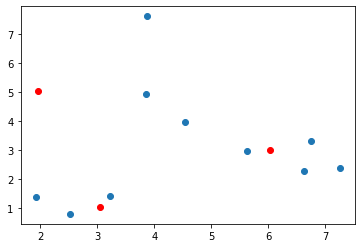

In [16]:
X_test = convert_X_to_df(X_test)
plt.scatter(X_test['x1'],X_test['x2'])
plt.scatter([mu_3[-1:,:1], mu_2[-1:,:1], mu_1[-1:,:1]], [mu_3[-1:,1:], mu_2[-1:,1:], mu_1[-1:,1:]], color='r')
plt.show()

- Affichage des résultats de l'entrainement et du test dans un graphe 2D :

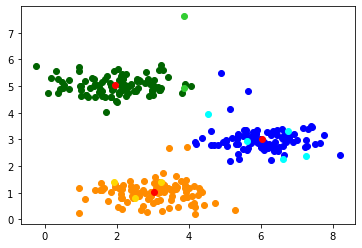

In [17]:
color = ['blue', 'darkgreen', 'darkorange']
color_test = ['cyan', 'limegreen', 'gold']
X = convert_to_array(X)
X_test = convert_to_array(X_test)

for i in range(I) :
    plt.scatter(X[i][0], X[i][1], c = color[Ŷ[i]])

for i in range(len(X_test)) :
    plt.scatter(X_test[i][0], X_test[i][1], c = color_test[Ŷ_test[i]])

    
plt.scatter([mu_3[-1:,:1], mu_2[-1:,:1], mu_1[-1:,:1]], [mu_3[-1:,1:], mu_2[-1:,1:], mu_1[-1:,1:]], color='r')
plt.show()

## 2 Homework tasks

### 2.1 K-means : Clustering some real data

- Récupération des données du fichier 'grade_students.csv' :

In [18]:
X = pd.read_csv('data/kmeans/grade_students.csv')
X

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
0,1,9,516,578,601,493
1,0,12,451,507,584,436
2,1,4,483,526,529,486
3,1,15,516,505,556,536
4,1,2,433,463,504,426
...,...,...,...,...,...,...
5545,0,4,478,532,548,481
5546,1,9,487,523,574,493
5547,1,3,487,515,556,506
5548,1,10,492,479,531,481


- Renseignement des dimensions/constantes :

In [19]:
X = pd.DataFrame(data = X, columns = ['g1freelunch','g1absent','g1readscore','g1mathscore',
                                           'g1listeningscore','g1wordscore'])

# Nombre d'exemples d'entrainement :
I = len(X)
print("I =", I)

# Nombre de features :
N = len(X.columns)
print("N =", N)

# Nombre ditération pour l'entrainement :
iteration = 1000
print("iteration =", iteration)

# Nombre de K
K = 3
print("K =", K)

I = 5550
N = 6
iteration = 1000
K = 3


- Fonction d'initialistation de ɵ :

In [20]:
def init() :
    mu1 = [X['g1freelunch'].mean(), X['g1absent'].mean(), X['g1readscore'].mean(), 
           X['g1mathscore'].mean(), X['g1listeningscore'].mean(), X['g1wordscore'].mean()]
    mu2 = [X['g1freelunch'].min(), X['g1absent'].min(), X['g1readscore'].min(), 
           X['g1mathscore'].min(), X['g1listeningscore'].min(), X['g1wordscore'].min()]
    mu3 = [X['g1freelunch'].max(), X['g1absent'].max(), X['g1readscore'].max(), 
           X['g1mathscore'].max(), X['g1listeningscore'].max(), X['g1wordscore'].max()]
    ɵ = [mu1, mu2, mu3]
    return ɵ

- Entrainement :

In [21]:
ɵ = init()
ɵ = convert_to_array(ɵ)
X = convert_to_array(X)
mu_1 = [ɵ[0].tolist()]
mu_2 = [ɵ[1].tolist()]
mu_3 = [ɵ[2].tolist()]

for itera in range(iteration) :
    D = get_D(ɵ, X)
    Ŷ = get_Ŷ(D)
    ɵ = get_ɵ(Ŷ, ɵ)
    mu_1.append(ɵ[0].tolist())
    mu_2.append(ɵ[1].tolist())
    mu_3.append(ɵ[2].tolist())

mu_1 = np.array(mu_1)
mu_2 = np.array(mu_2)
mu_3 = np.array(mu_3)

- Affichage des résultats et interprétation :


Cluster 0 :
    - g1absent : 7.404656764351666  |  6.859361163240426
    - g1freelunch : 0.5114411882778  |  0.49991925713610286
    - g1listeningscore : 565.8978321959053  |  29.04550285352959
    - g1mathscore : 529.227217984745  |  36.31676204217704
    - g1readscore : 517.6796467282215  |  47.193201806651636
    - g1wordscore : 513.415295062224  |  47.24693203513652

Cluster 1 :
    - g1absent : 9.372093023255815  |  10.725163127125654
    - g1freelunch : 0.8558139534883721  |  0.3520980677838211
    - g1listeningscore : 518.353488372093  |  16.35744634282837
    - g1mathscore : 455.6093023255814  |  18.81950437280639
    - g1readscore : 433.2232558139535  |  10.55764853654304
    - g1wordscore : 415.9720930232558  |  19.159418824978296

Cluster 2 :
    - g1absent : 6.46742209631728  |  5.872672496912087
    - g1freelunch : 0.1359773371104816  |  0.3432510338108347
    - g1listeningscore : 625.1444759206798  |  28.54788798349734
    - g1mathscore : 609.1104815864022  |  29.0386053

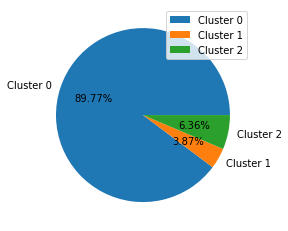

In [22]:
Result = pd.DataFrame(data = X, columns = ['g1freelunch','g1absent','g1readscore','g1mathscore',
                                           'g1listeningscore','g1wordscore'])
Result['Ŷ'] = Ŷ
Repartition = []

for y in Result['Ŷ'].unique() :
    print("\nCluster", y, ":")
    for col in Result.columns.difference(['Ŷ']) :
        print("    -", col, ":", Result[col][Result['Ŷ'] == y].mean(), " | ", Result[col][Result['Ŷ'] == y].std())
        
    Repartition.append(len(Result[col][Result['Ŷ'] == y]))

plt.pie(Repartition, labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], 
        autopct = lambda Repartition: str(round(Repartition, 2)) + '%', normalize = True)
plt.legend()
plt.show()

Une représentation graphique pour analyser les écarts-types serait trop compliquée, et pas du tout parlante, c'est pourquoi nous avons décidé de nous baser sur les moyennes et les écart-types.

Après 1000 itérations, on peut en déduire que :

- le cluster 0 correspond aux élèves moyens : la moyenne de chaque caractéristique pour tous les élèves est moyen, ce qui indique la position du point de référence du cluster (mu0). L'écart type est assez significatif puisque, est confirme bien que les étudiants de ce cluster sont dans la moyenne.

- le cluster 1 correspond aux plus faibles élèves : ils ont le plus grand nombre d'abscence et les notes les plus basses avec un ecart type qui encore une fois est relativement assez proche de la moyenne de ce cluster.

- le cluster 2 correspond aux élèves les plus forts : la moyenne d'absence est la plus faible et les moyennes de notes sont les meilleures.


On constate aussi que le nombre d'élèves dans le cluster 0 représente presque 90% des élèves. On peut donc en déduire que 90% des élèves sont des élèves moyens.

Pour les trois clusters, l'écart-type est assez significatif puisqu'on remarque qu'ils "n'empiètent" pas ou très peu sur les autres clusters.

## 2.2 PCA : Reducing the dimension of some synthetic data

- Récupération des données du fichier 'grade_students.csv' :

In [23]:
X = pd.read_csv('data/pca/data_pca.txt', names = ['x1','x2'], sep = " ")
X.head()

,x1,x2
0,3.3816,3.3891
1,4.5279,5.8542
2,2.6557,4.4120
3,2.7652,3.7154
4,2.8466,4.1755


- Représentation graphique des données :

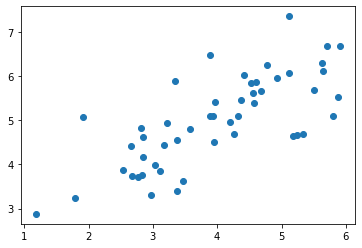

In [24]:
X = convert_X_to_df(X)
plt.scatter(X['x1'], X['x2'])
plt.show()

- Fonction de récupération du centroïde des données :

In [25]:
def get_mu(X) :
    l_mu = []
    for col in range(X.shape[1]):
        l_mu.append(np.mean(X[:,col:col+1]))
    return l_mu

- Fonction de centrage des données :

In [26]:
def change_x(X, mu) :
    return X - mu

- Entrainement :

In [27]:
new_X = convert_to_array(X)

# Récupération de la moyenne :
mu = get_mu(new_X)

# Centrage des données autour de 0 :
new_X = change_x(new_X, mu)

# Calcul de la covariance :
CV = np.cov(new_X.T)

# Récupération des vecteurs propre et valeurs propre :
eig_vals, eig_vecs = np.linalg.eig(CV)

- On affiche la liste des valeurs propres :

In [28]:
print(eig_vals)

[2.10989648 0.31353957]


La première valeur de la liste est la plus grande. On choisi donc l'index 0 pour le vecteur propre que nous utiliserons.

- Représentation graphique :

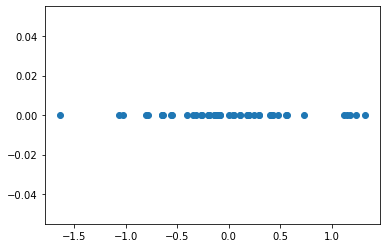

In [29]:
Z = pd.DataFrame(data = np.array(new_X.dot(eig_vecs[0].T)), columns = ['X'])
Z['Y'] = 0 * len(Z) 
plt.scatter(Z['X'], Z['Y'])
plt.show()

- Création des données de test :

In [30]:
X_test = np.random.rand(10,2)*6-3
print(X_test)

[[-0.23377581 -0.435062  ]
 [ 1.12566195 -1.83516521]
 [ 1.78754035 -1.33182964]
 [-2.75964215  0.33112121]
 [-0.9749121  -2.62051447]
 [ 0.58608919 -1.51254151]
 [ 0.7204669   0.50382257]
 [ 1.83377811 -0.33179001]
 [-1.9962609  -1.7313076 ]
 [-0.40842372 -0.17916162]]


- Représentation graphique du train et test en 2D :

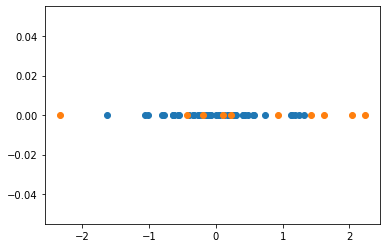

In [31]:
Z = pd.DataFrame(data = np.array(new_X.dot(eig_vecs[0].T)), columns = ['X'])
Z['Y'] = 0 * len(Z)
Z_test = pd.DataFrame(data = np.array(X_test.dot(eig_vecs[0].T)), columns = ['X'])
Z_test['Y'] = 0 * len(Z_test)
plt.scatter(Z['X'], Z['Y'])
plt.scatter(Z_test['X'], Z_test['Y'])
plt.show()

## 2.3 PCA: Reducing the dimension of some real data

- Récupération des données du fichier 'diabetes.csv' :

In [32]:
X = pd.read_csv('data/pca/diabetes.csv')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Reduction de dimension :

In [33]:
new_X = convert_to_array(X.drop(columns=['Outcome']))

# Récupération de la moyenne :
mu = get_mu(new_X)

# Centrage des données autour de 0 :
new_X = change_x(new_X, mu)

# Calcul de la covariance :
CV = np.cov(new_X.T)

# Récupération des vecteurs propre et valeurs propre :
eig_vals, eig_vecs = np.linalg.eig(CV)

Nous posons P = 2 :

In [34]:
print(eig_vals)

[1.34565730e+04 9.32760132e+02 3.90577831e+02 1.98182691e+02
 1.12689115e+02 4.58294431e+01 7.76070899e+00 1.02871018e-01]


Les 2 valeurs propres les plus grandes sont celles aux index 0 et 1 :

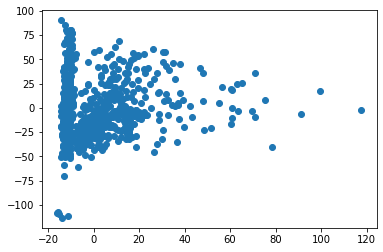

In [35]:
Z = pd.DataFrame(data = np.array(new_X.dot(eig_vecs[0].T)), columns = ['X'])
Z['Y'] = new_X.dot(eig_vecs[1].T)
plt.scatter(Z['X'], Z['Y'])
plt.show()

On voit que la forme du graphe est divisée : Une partie à gauche verticale et un nuge de point plus à droite qui s'apparente plus à un nuage de points.